In [1]:
library(tidyverse)
library(ggplot2)
library(corrplot)
library(dplyr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
corrplot 0.92 loaded


In [2]:
df <- read.csv("dataset/dataCovidPredict.csv")

# Check dataset type

In [3]:
str(df)

'data.frame':	854 obs. of  18 variables:
 $ txn_date                            : Factor w/ 854 levels "1/1/2021","1/1/2022",..: 7 10 13 16 19 22 25 28 33 36 ...
 $ new_case                            : int  1 0 0 0 0 1 0 0 0 0 ...
 $ total_case                          : int  1 1 1 1 1 2 2 2 2 2 ...
 $ new_case_excludeabroad              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ total_case_excludeabroad            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ new_death                           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ total_death                         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ new_recovered                       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ total_recovered                     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ total_vaccinations                  : int  NA NA NA NA NA NA NA NA NA NA ...
 $ people_vaccinated                   : int  NA NA NA NA NA NA NA NA NA NA ...
 $ people_fully_vaccinated             : int  NA NA NA NA NA NA NA NA NA NA ...
 $ total_boosters                     

In [4]:
# Consider txn_date is type factor. We have to change it to date type.
df$txn_date <- as.Date(df$txn_date, format="%m/%d/%Y")

In [5]:
tail(df)

,txn_date,new_case,total_case,new_case_excludeabroad,total_case_excludeabroad,new_death,total_death,new_recovered,total_recovered,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,stringency_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality
849,2022-05-09,6488,4331338,6484,4306415,55,29143,12755,4217238,134227921,56228301,51557902,26441718,121514,45.83,NA,NA,NA
850,2022-05-10,6230,4337568,6226,4312641,53,29196,11132,4228370,134381378,56245937,51608288,26527153,125360,45.83,NA,NA,NA
851,2022-05-11,7650,4345218,7647,4320288,56,29252,9322,4237692,134546583,56265514,51667069,26614000,144476,45.83,NA,NA,NA
852,2022-05-12,8019,4353237,8016,4328304,59,29311,8807,4246499,134753182,56289325,51747964,26715893,147772,45.83,NA,NA,NA
853,2022-05-13,7779,4361016,7777,4336081,56,29367,9286,4255785,134803233,56293551,51760847,26748835,117144,45.83,NA,NA,NA
854,2022-05-14,6736,4367752,6734,4342815,54,29421,9213,4264998,134947988,56307248,51799840,26840900,51790,45.83,NA,NA,NA


In [6]:
str(df)

'data.frame':	854 obs. of  18 variables:
 $ txn_date                            : Date, format: "2020-01-12" "2020-01-13" ...
 $ new_case                            : int  1 0 0 0 0 1 0 0 0 0 ...
 $ total_case                          : int  1 1 1 1 1 2 2 2 2 2 ...
 $ new_case_excludeabroad              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ total_case_excludeabroad            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ new_death                           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ total_death                         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ new_recovered                       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ total_recovered                     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ total_vaccinations                  : int  NA NA NA NA NA NA NA NA NA NA ...
 $ people_vaccinated                   : int  NA NA NA NA NA NA NA NA NA NA ...
 $ people_fully_vaccinated             : int  NA NA NA NA NA NA NA NA NA NA ...
 $ total_boosters                      : int  NA NA NA NA NA NA NA NA NA N

# Check NA

In [7]:
sum(is.na(df))

[1] 4857

In [8]:
df %>% select(everything()) %>% 
  summarise_all(list(~sum(is.na(.))))

txn_date,new_case,total_case,new_case_excludeabroad,total_case_excludeabroad,new_death,total_death,new_recovered,total_recovered,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,stringency_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality
0,0,0,0,0,0,0,0,0,458,458,463,587,413,0,826,826,826


In [9]:
# Replace NA with 0 
df[is.na(df)] <- 0

In [10]:
sum(is.na(df))

[1] 0

In [11]:
df %>% select(everything()) %>% 
  summarise_all(list(~sum(is.na(.))))

txn_date,new_case,total_case,new_case_excludeabroad,total_case_excludeabroad,new_death,total_death,new_recovered,total_recovered,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,stringency_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
df

txn_date,new_case,total_case,new_case_excludeabroad,total_case_excludeabroad,new_death,total_death,new_recovered,total_recovered,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,stringency_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality
2020-01-12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.00,0.00
2020-01-13,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.00,0.00
2020-01-14,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.00,0.00
2020-01-15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.00,0.00
2020-01-16,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.00,0.00
2020-01-17,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.00,0.00
2020-01-18,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.00,0.00
2020-01-19,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.00,0.00
2020-01-20,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.00,0.00
2020-01-21,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.00,0.00


# Check Outlier

Warning message in stack.data.frame(df):
"non-vector columns will be ignored"

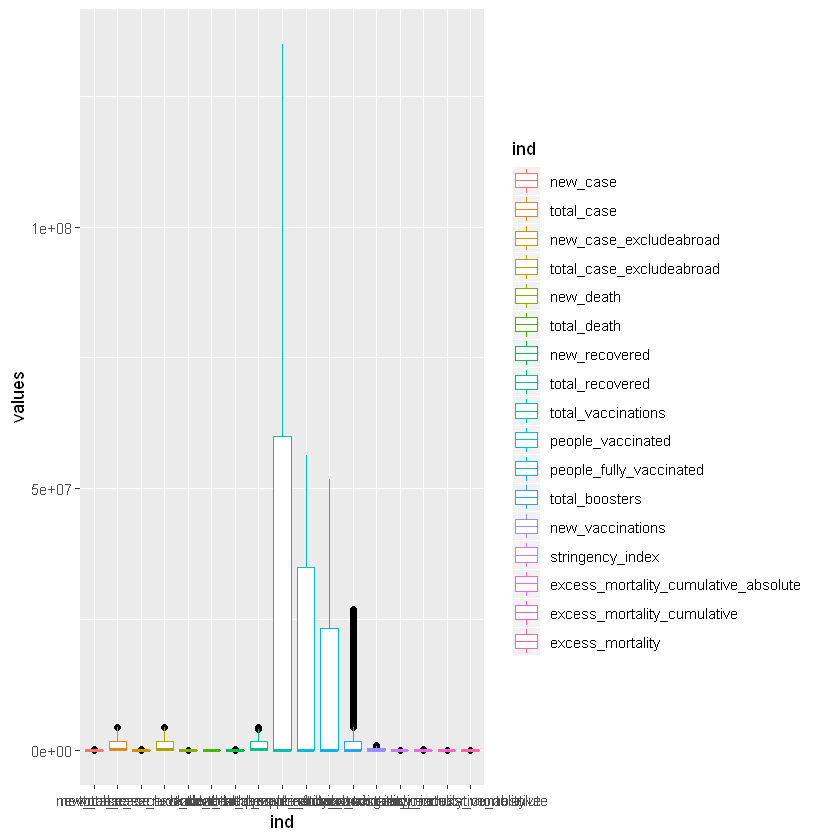

In [20]:
ggplot(stack(df), aes(x = ind, y = values, color=ind)) +
  geom_boxplot(outlier.color="black")